In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("shampoo_sales.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [3]:
df.set_index('Month',inplace=True)
df

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


In [5]:
df.index = pd.to_datetime(df.index,format="%d-%m")

In [7]:
df.index = df.index.map(lambda t:t.replace(year=2027))
df

,Sales
Month,
2027-01-01,266.0
2027-02-01,145.9
2027-03-01,183.1
2027-04-01,119.3
2027-05-01,180.3
2027-06-01,168.5
2027-07-01,231.8
2027-08-01,224.5
2027-09-01,192.8


<Axes: xlabel='Month'>

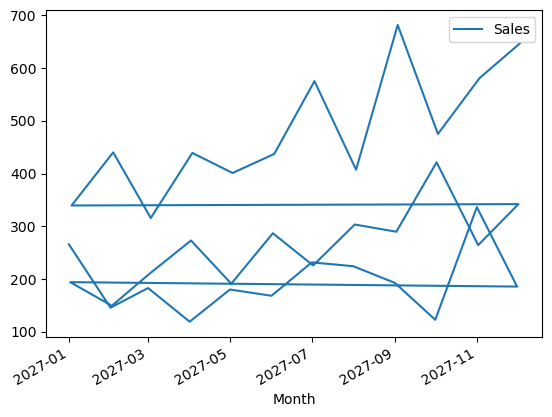

In [8]:
df.plot()

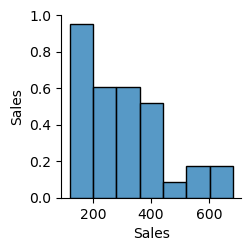

In [9]:
sns.pairplot(df)

In [10]:
upsample = df.resample('D')

In [12]:
interpolated = upsample.interpolate(method='linear')

In [13]:
interpolated

,Sales
Month,
2027-01-01,266.000000
2027-01-02,194.300000
2027-01-03,339.700000
2027-01-04,333.017241
2027-01-05,326.334483
...,...
2027-11-29,214.142857
2027-11-30,200.021429
2027-12-01,185.900000


In [14]:
interpolated = upsample.interpolate(method='spline',order=2)
interpolated

,Sales
Month,
2027-01-01,266.000000
2027-01-02,194.300000
2027-01-03,339.700000
2027-01-04,500.306566
2027-01-05,644.186218
...,...
2027-11-29,-8.595379
2027-11-30,74.425837
2027-12-01,185.900000


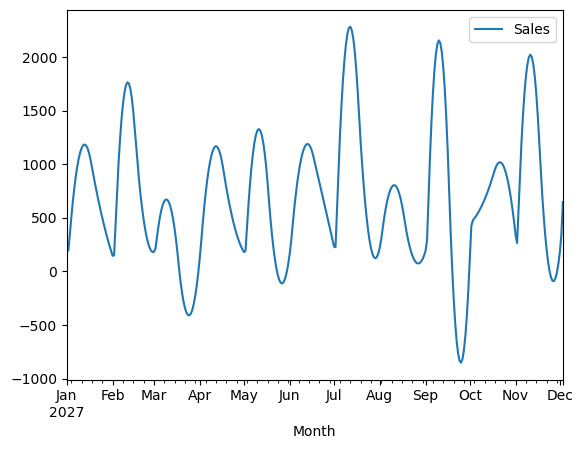

In [15]:
interpolated.plot()
plt.show()

In [19]:
upsample = df.resample('QE').mean()

In [20]:
upsample.head()

,Sales
Month,
2027-03-31,249.433333
2027-06-30,277.533333
2027-09-30,348.188889
2027-12-31,375.244444


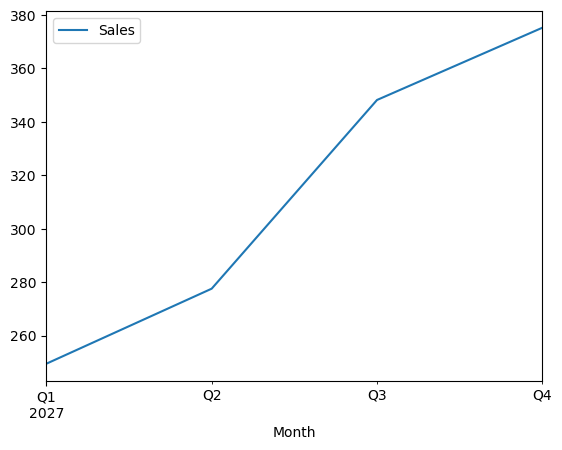

In [21]:
upsample.plot()
plt.show()

In [22]:
upsample = df.resample('YE').sum()

In [24]:
upsample.head()

,Sales
Month,
2027-12-31,11253.6


C:\Users\Sanjana Shankar\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


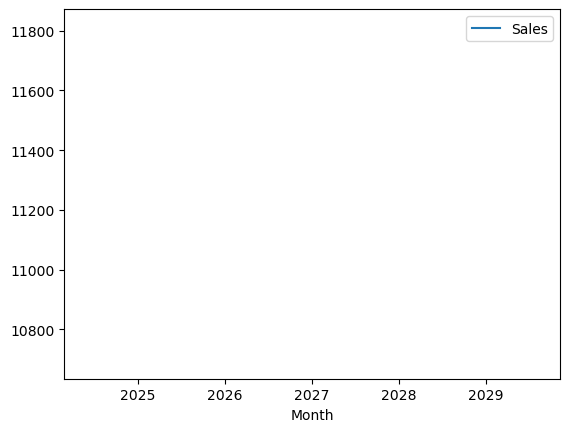

In [25]:
upsample.plot()
plt.show()